#### Facebook Prophet Tutorial 
![](facebookprophet.png)

#### Installing
+ pip install pystan
+ pip install fbprophet
+ conda install -c conda-forge fbprophet

### Intro To Facebook Prophet
+ Steps
    - Initialize Model :: Prophet()
    - Set columns as ds,y
    - Fit dataset :: Prophet().fit()
    - Create Dates To predict :: Prophet().make_future_dataframe(periods=365)
    - Predict :: Prophet().predict(future_dates)  
    - Plot :: Prophet().plot(predictions)

In [1]:
# Load EDA Pkgs
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load FB Prophet
import fbprophet

Importing plotly failed. Interactive plots will not work.


In [3]:
dir(fbprophet)

['Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'diagnostics',
 'forecaster',
 'hdays',
 'make_holidays',
 'models',
 'plot']

In [4]:
# Load our Dataset
df = pd.read_csv("flights_data.csv")

In [5]:
df.head()

,Dates,no_of_flights
0,2005-01-01,594924
1,2005-02-01,545332
2,2005-03-01,617540
3,2005-04-01,594492
4,2005-05-01,614802


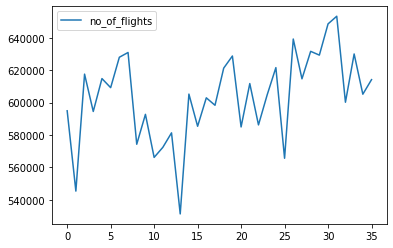

In [6]:
df.plot()

In [8]:
#yt = yt -y(t-1)
df['no_of_flights'] = df['no_of_flights'] - df['no_of_flights'].shift(1)

In [9]:
df.describe()

,no_of_flights
count,34.00000
mean,1723.00000
std,63050.69663
min,-98166.00000
25%,-52047.25000
50%,-8160.50000
75%,40500.00000
max,129560.00000


In [13]:
df

,Dates,no_of_flights
0,2005-01-01,NaN
1,2005-02-01,-49592.0
2,2005-03-01,72208.0
3,2005-04-01,-23048.0
4,2005-05-01,20310.0
5,2005-06-01,-5607.0
6,2005-07-01,18766.0
7,2005-08-01,2943.0
8,2005-09-01,-56651.0
9,2005-10-01,18459.0


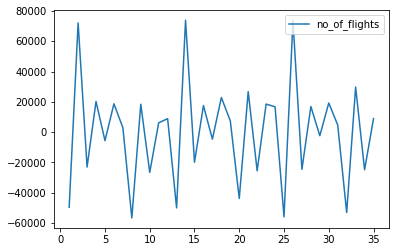

In [10]:
df.plot()

In [14]:
from fbprophet import Prophet

In [15]:
# Features of Prophet
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_column_matrix',
 'sample_model',
 'samp

In [16]:
# Initialize the Model
model = Prophet()

#### Parameters
+ growth: linear/logistic
+ seasonality:additive/multiplicative
+ holidays:
+ changepoint:

In [17]:
df.columns

Index(['Dates', 'no_of_flights'], dtype='object')

In [18]:
# Works with a ds and y column names
df.rename(columns={'Dates':'ds','no_of_flights':'y'},inplace=True)

In [19]:
df.head()

,ds,y
0,2005-01-01,NaN
1,2005-02-01,-49592.0
2,2005-03-01,72208.0
3,2005-04-01,-23048.0
4,2005-05-01,20310.0


In [20]:
df = df[1:]

In [21]:
df.head()

,ds,y
1,2005-02-01,-49592.0
2,2005-03-01,72208.0
3,2005-04-01,-23048.0
4,2005-05-01,20310.0
5,2005-06-01,-5607.0


In [22]:
# Fit our Model to our Data
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
# Shape of Dataset
df.shape

(35, 2)

In [24]:
# Create Future Dates of 365 days
future_dates = model.make_future_dataframe(periods=365)

In [25]:
# Shape after adding 365 days
future_dates.shape

(400, 1)

In [26]:
future_dates.head()

,ds
0,2005-02-01
1,2005-03-01
2,2005-04-01
3,2005-05-01
4,2005-06-01


In [27]:
# Make Prediction with our Model
prediction = model.predict(future_dates)

In [28]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-02-01,-2571.714150,-52574.956118,-45981.624020,-2571.714150,-2571.714150,-46882.135892,-46882.135892,-46882.135892,-46882.135892,-46882.135892,-46882.135892,0.0,0.0,0.0,-49453.850042
1,2005-03-01,-2445.189985,67517.740915,74120.760895,-2445.189985,-2445.189985,73145.012894,73145.012894,73145.012894,73145.012894,73145.012894,73145.012894,0.0,0.0,0.0,70699.822909
2,2005-04-01,-2305.109659,-27411.120632,-20516.460974,-2305.109659,-2305.109659,-21686.914066,-21686.914066,-21686.914066,-21686.914066,-21686.914066,-21686.914066,0.0,0.0,0.0,-23992.023726
3,2005-05-01,-2169.548054,14416.347272,21115.130458,-2169.548054,-2169.548054,19993.464271,19993.464271,19993.464271,19993.464271,19993.464271,19993.464271,0.0,0.0,0.0,17823.916217
4,2005-06-01,-2029.467726,-11011.722065,-4285.952530,-2029.467726,-2029.467726,-5302.735919,-5302.735919,-5302.735919,-5302.735919,-5302.735919,-5302.735919,0.0,0.0,0.0,-7332.203646


#### Narrative
+ yhat : the predicted forecast
+ yhat_lower : the lower border of the prediction
+ yhat_upper: the upper border of the prediction

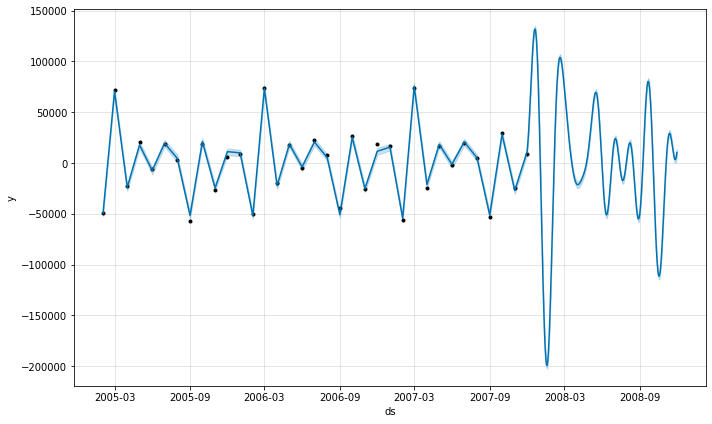

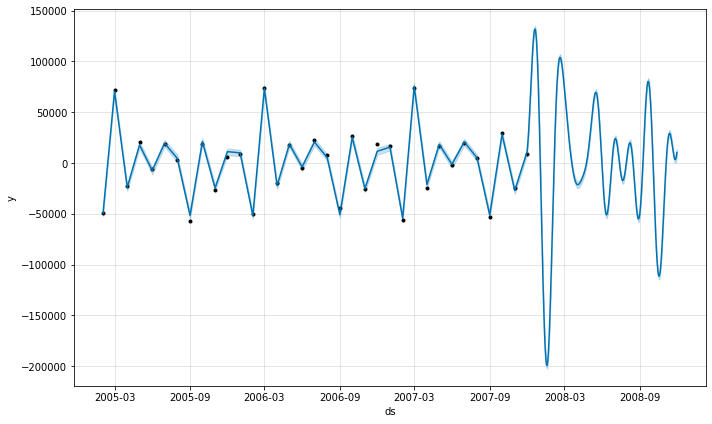

In [29]:
# Plot Our Predictions
model.plot(prediction)

#### Narrative
+ A Trending data
+ Black dots : the actual data points in our dataset.
+ Deep blue line : the predicted forecast/the predicted values
+ Light blue line : the boundaries

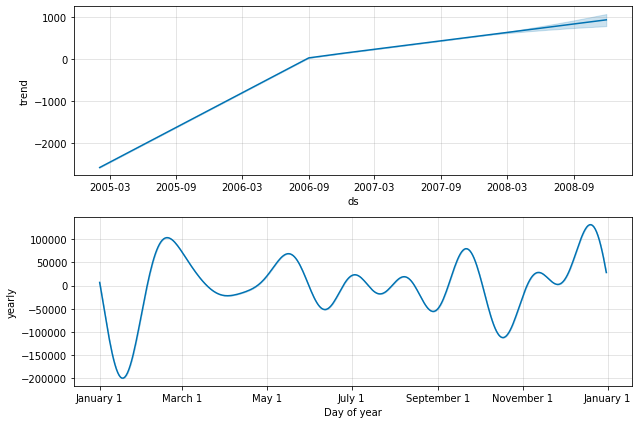

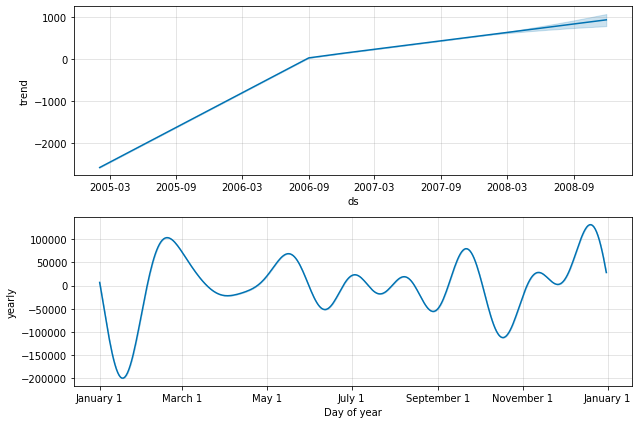

In [30]:
# Visualize Each Component [Trends,Weekly]
model.plot_components(prediction)

### Cross Validation
+ For measuring forecast error by comparing the predicted values with the actual values
+ initial:the size of the initial training period
+ period : the spacing between cutoff dates
+ horizon : the forecast horizon((ds minus cutoff)
+  By default, the initial training period is set to three times the horizon, and cutoffs are made every half a horizon

In [31]:
# Load Pkgs
from fbprophet.diagnostics import cross_validation

In [32]:
df.shape

(35, 2)

In [33]:
cv = cross_validation(model,initial='35 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 4 forecasts with cutoffs between 2005-06-09 00:00:00 and 2006-12-01 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.
INFO:fbprophet:n_changepoints greater than number of observations. Using 17.


In [34]:
cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2005-07-01,-2.998956e+05,-2.998956e+05,-2.998956e+05,18766.0,2005-06-09
1,2005-08-01,-1.506471e+06,-1.506471e+06,-1.506471e+06,2943.0,2005-06-09
2,2005-09-01,4.293684e+03,4.293683e+03,4.293685e+03,-56651.0,2005-06-09
3,2005-10-01,1.213440e+06,1.213440e+06,1.213440e+06,18459.0,2005-06-09
4,2005-11-01,-2.180407e+05,-2.180407e+05,-2.180407e+05,-26574.0,2005-06-09


#### Performance Metrics


In [36]:
from fbprophet.diagnostics import performance_metrics

In [37]:
df_pm = performance_metrics(cv)

In [38]:
df_pm

,horizon,mse,rmse,mae,mape,mdape,coverage
0,31 days,2.692910e+10,164100.895645,102813.813574,6.589854,4.597027,0.00
1,53 days,5.711252e+11,755728.239683,400501.823432,130.565316,4.597027,0.00
2,57 days,5.827072e+11,763352.591903,438304.026472,129.539674,2.545742,0.00
3,58 days,5.826882e+11,763340.159421,437355.801093,129.680706,2.827806,0.00
4,62 days,5.827802e+11,763400.445519,441439.714453,129.721404,2.827806,0.00
5,84 days,1.412643e+10,118854.679447,79322.480541,1.769691,1.079564,0.00
6,85 days,1.410763e+10,118775.525681,79281.360860,1.399342,1.079564,0.00
7,89 days,1.409591e+10,118726.194857,78341.366537,1.153351,0.711576,0.25
8,90 days,1.406118e+10,118579.838784,77345.962716,1.119003,0.642882,0.25
9,114 days,3.701274e+11,608380.996828,360855.010334,17.034313,1.650424,0.25


### Visualizing Performance Metrics
+ cutoff: how far into the future the prediction was

In [39]:
from fbprophet.plot import plot_cross_validation_metric

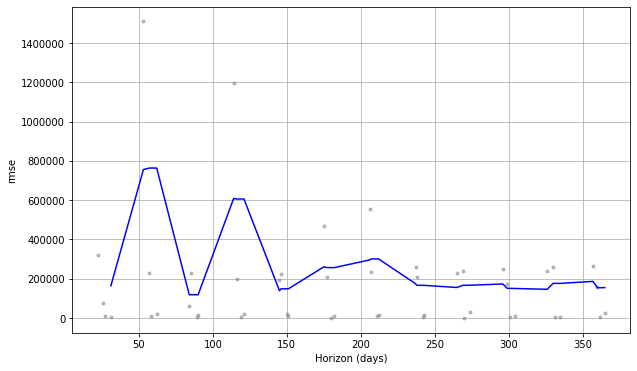

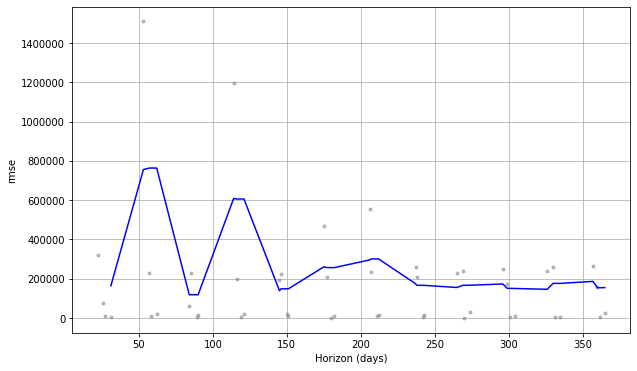

In [40]:
plot_cross_validation_metric(cv,metric='rmse')

In [92]:
### Thanks For Watching
### Jesus Saves @JCharisTech
### Jesse E.Agbe(JCharis)
### J-Secur1ty